In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

In [19]:
from matplotlib import colors
def curve_color(x, y):
    """
    The color (RGB) on the curve at position (x, y) 
    """
    # assume return a color value between (0, 1)
    norm = colors.Normalize(vmin=0, vmax=1)
    mapper = cm.ScalarMappable(norm=norm, cmap='rainbow')
    return mapper.to_rgba(x)[:, :3]

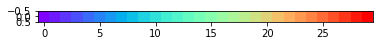

In [27]:
x = np.linspace(-1, 1, 30)
y = x
plt.imshow(curve_color(x, y).reshape(1, -1, 3), cmap='rainbow')

In [25]:
curve_color(x, y).shape

(30, 3)

In [17]:
mapper = cm.ScalarMappable(cmap='rainbow')

In [1]:
import torch

In [6]:
fov = torch.tensor([5, 10])
angle_min, angle_max = fov
angle = torch.linspace(angle_min, angle_max, angle_max - angle_min + 1)

In [16]:
[torch.cos(angle), torch.sin(angle)]

[tensor([ 0.2837,  0.9602,  0.7539, -0.1455, -0.9111, -0.8391]),
 tensor([-0.9589, -0.2794,  0.6570,  0.9894,  0.4121, -0.5440])]

In [25]:
dirs = torch.vstack([torch.cos(angle), torch.sin(angle)])

In [23]:
R = torch.eye(2)

In [26]:
dirs.shape

torch.Size([2, 6])

In [28]:
def get_dirs(fov):
    """[summary]

    Returns:
        [type]: [description]
    """    
    
    angle_min, angle_max = fov
    angle = torch.linspace(angle_min, angle_max, angle_max - angle_min + 1)
    return torch.vstack([torch.cos(angle), torch.sin(angle)])


def get_rays(fov, c2w):
    """
    Start from camera center, sample points from fov along certain depth distance,
    then transform the points to the world coordinates

    For the camera coordinates, y is pointing to the world center and x forms a 
    right-hand coordinates with y facing outward

    Args:
        fov (N, 2): [description]
        c2w (N, 3, 3): [description]
    
    Returns:
        rays_d (N, 2) direction rays
        rays_o (N, 2) origin of rays
    """
    
    # sample distance along each rays_d
    dirs = get_dirs(fov)

    R, t = c2w[:2, :2], c2w[:2, -1]
    rays_d = R @ dirs # (N, 2, N)
    rays_o = t.expand(rays_d.shape)
    return rays_d.t(), rays_o.t()

In [ ]:
fov = torch.tensor([-1, 1])
c2w = torch.tensor([[0, -1, 0],
                    [1, 0, 1],
                    [0, 0, 0]])

In [25]:
import torch
import math
r = 3
theta = torch.linspace(0, 2 * math.pi, 360)
torch.stack([r * torch.cos(theta), r * torch.sin(theta)]).shape

torch.Size([2, 360])

In [27]:
mapper = cm.ScalarMappable(cmap='rainbow')

In [28]:
x = r * torch.cos(theta)
y = r * torch.sin(theta)
# x, y = x.numpy(), y.numpy()
color = mapper.to_rgba(x)[..., :3]

In [29]:
color[0]

array([1.0000000e+00, 1.2246468e-16, 6.1232340e-17])

In [30]:
x.shape, color.shape

(torch.Size([360]), (360, 3))

(-3.2998793363571166,
 3.2999942541122436,
 -3.2999682664871215,
 3.2999682664871215)

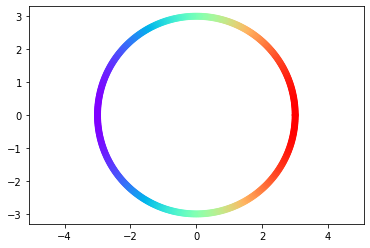

In [31]:
plt.scatter(x, y, c=color)
plt.axis('equal')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

(-3.2998793363571166,
 3.2999942541122436,
 -3.2999682664871215,
 3.2999682664871215)

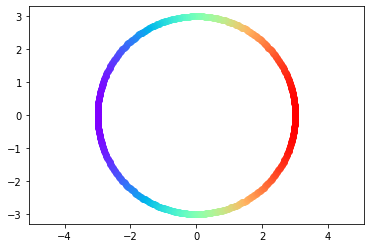

In [26]:
for i in range(len(x)):
    plt.scatter(x[i], y[i], c=color[i])
plt.axis('equal')

In [35]:
import torch
import math

from model import NeRF
from run_nerf import render_rays
from matplotlib import cm, colors
import matplotlib.pyplot as plt


def render_path_circle(model, cuda=True):
    """
    Sample points along the circle and render what is the view
    """
    r = 3
    theta = torch.linspace(0, 2 * math.pi, 360)
    x, y = r * torch.cos(theta), r * torch.sin(theta)
    rays_o = torch.stack([x, y]).t()
    rays_d = -theta
    view_dirs = rays_d
    if cuda:
        rays_o, rays_d, view_dirs = rays_o.cuda(), rays_d.cuda(), view_dirs.cuda()
    res = render_rays(rays_o, rays_d, view_dirs, model.forward)
    return x, y, res

def vis_res(x, y, pred):
    # norm = colors.Normalize(vmin=0, vmax=1)
    # mapper = cm.ScalarMappable(norm=norm, cmap='rainbow')
    color = pred #mapper.to_rgba(pred)[..., :3]
    plt.scatter(x, y, c=color)
    plt.axis('equal')
    plt.savefig('res.png', dpi=1000)

In [9]:
model = NeRF.load_from_checkpoint('lightning_logs/version_28_good/checkpoints/epoch=8-step=1412.ckpt')


In [10]:
model.cuda()
model.eval()
with torch.no_grad():
    x, y, res = render_path_circle(model)

In [33]:
res = res.cpu()

(-3.2998793363571166,
 3.2999942541122436,
 -3.2999682664871215,
 3.2999682664871215)

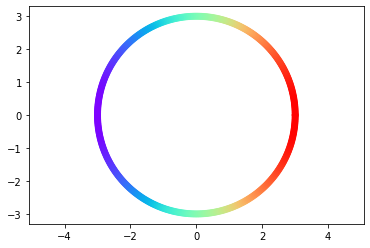

In [36]:
vis_res(x.numpy(), y.numpy(), res.numpy())
plt.axis('equal')

(-3.2998793363571166,
 3.2999942541122436,
 -3.2999682664871215,
 3.2999682664871215)

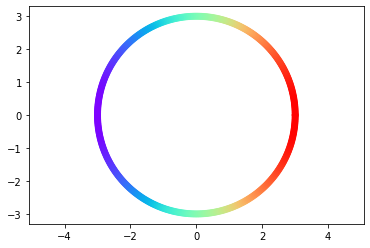

In [34]:
vis_res(x.numpy(), y.numpy(), res.numpy())
plt.axis('equal')

In [18]:
res.shape

torch.Size([360, 3])

In [22]:
x.shape

torch.Size([360])

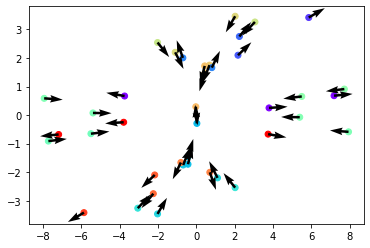

In [2]:
from dataloader import OneDCurveOccData
from vis import vis_data
dataset = OneDCurveOccData(20)
vis_data(dataset.x, dataset.y, dataset.view, dataset.color)

In [14]:
import math
import torch
import matplotlib.pyplot as plt
from matplotlib import cm
def curve_fn(x, y):
    """
    Implicit function f(x, y). If f(x, y) == 0 then it is on the curve. 
    """
    return x**2 + y**2 - 1 

def curve_color(x, y):
    """
    The color (RGB) on the curve at position (x, y) 
    """
    # assume return a color value between (0, 1)
    mapper = cm.ScalarMappable(cmap='rainbow')
    return mapper.to_rgba(x)[:3]


def get_dirs(fov):
    """given fov as min and max angle, return intermediate unit direction
    with step size = one degree

    Returns:
        (2, N): N unit direction 
    """    
    angle_min, angle_max = fov
    steps = int((angle_max - angle_min)/math.pi * 180 + 1) // 10
    angle = torch.linspace(angle_min, angle_max, steps)
    return torch.vstack([torch.cos(angle), torch.sin(angle)])


def get_rays(fov, c2w):
    """
    Start from camera center, sample points from fov along certain depth distance,
    then transform the points to the world coordinates

    For the camera coordinates, y is pointing to the world center and x forms a 
    right-hand coordinates with y facing outward

    Args:
        fov (2): [description]
        c2w (N, 3, 3): [description]
    
    Returns:
        rays_d (N, 2) direction rays
        rays_o (N, 2) origin of rays
    """
    
    # sample distance along each rays_d
    dirs = get_dirs(fov)

    R, t = c2w[..., :2, :2], c2w[..., :2, -1]
    rays_d = (R @ dirs)
    rays_o = t[...,None].expand(rays_d.shape)
    rays_d, rays_o = rays_d.transpose(1, 2).reshape(-1, 2), rays_o.transpose(1, 2).reshape(-1, 2)
    return rays_d, rays_o


def get_trans_c2w(r, theta):
    """
    

    Args:
        r (N): sample distance
        theta (N): sample angle

    Returns:
        c2w (N, 2, 3): 
    """
    tx = r * torch.cos(theta)
    ty = r * torch.sin(theta)
    c2w = torch.zeros(r.shape + (2, 3))

    new_theta = theta + math.pi
    c2w[..., 0, 0] = torch.cos(new_theta)
    c2w[..., 0, 1] = -torch.sin(new_theta)
    c2w[..., 1, 0] = torch.sin(new_theta)
    c2w[..., 1, 1] = torch.cos(new_theta)
    
    c2w[..., 0, 2:] = tx.reshape(-1, 1)
    c2w[..., 1, 2:] = ty.reshape(-1, 1)
    return c2w
 
def sample_camera_pose(n_samples, near=1.5, far=5):
    """
    Sample a few c2w to generate view data
    """
    # sample points in polar coordinates
    
    r_rand  = torch.rand(n_samples)
    r = (1 - r_rand) * near + r_rand * far # uniformly sample from [near, far]
    
    theta = torch.rand(n_samples) * 2 * math.pi  # uniformly sample from [0, 2*pi]

    c2w = get_trans_c2w(r, theta)
    return c2w

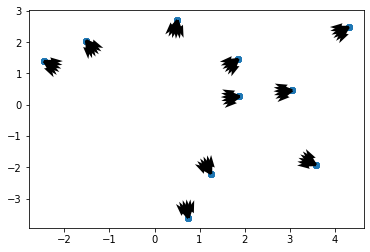

In [15]:
n_samples = 10
c2w = sample_camera_pose(n_samples)
fov = torch.tensor([-math.pi/6, math.pi/6])
rays_d, rays_o = get_rays(fov, c2w)
x, y = rays_o[:, 0], rays_o[:, 1]
u, v = rays_d[:, 0], rays_d[:, 1]
plt.scatter(x, y)
plt.quiver(x, y, u, v)

In [16]:
n_samples = 10
r_rand  = torch.rand(n_samples)
r = (1 - r_rand) * 1.5 + r_rand * 5 # uniformly sample from [near, far]

theta = torch.rand(n_samples) * 2 * math.pi  # uniformly sample from [0, 2*pi]

c2w = get_trans_c2w(r, theta)
# c2w = sample_camera_pose(n_samples)
c2w.shape

torch.Size([10, 2, 3])

In [17]:
r[0], theta[0]

(tensor(1.8779), tensor(5.5876))

In [18]:
r * torch.cos(theta)

tensor([ 1.4416,  4.0475, -0.0483,  4.5167, -1.6817, -0.5049,  1.8868,  3.5587,
         2.2510,  0.3017])

In [19]:
r * torch.sin(theta)

tensor([-1.2035,  0.5717, -4.0937, -1.5460, -4.4597, -2.6185,  1.5653, -1.9708,
        -3.5423,  2.3529])

In [20]:
fov = torch.tensor([-math.pi/6, math.pi/6])
dirs = get_dirs(fov)

In [21]:
dirs.shape

torch.Size([2, 6])

In [22]:
R, t = c2w[..., :2, :2], c2w[..., :2, -1]
# (n_samples_camera, 2, n_samples_fov)
rays_d = (R @ dirs)
rays_o = t[...,None].expand(rays_d.shape)
rays_d, rays_o = rays_d.transpose(1, 2).reshape(-1, 2), rays_o.transpose(1, 2).reshape(-1, 2)

In [23]:
torch.cos(theta[0]), torch.sin(theta[0])

(tensor(0.7677), tensor(-0.6409))

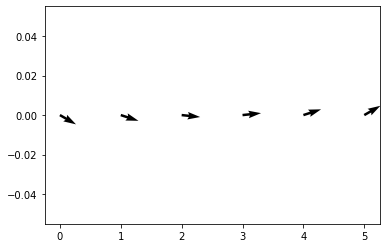

In [24]:
plt.quiver(dirs[0], dirs[1])

In [25]:
R[0] 

tensor([[-0.7677, -0.6409],
        [ 0.6409, -0.7677]])

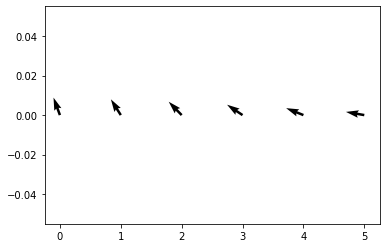

In [26]:
new_dirs = (R[0] @ dirs)
plt.quiver(new_dirs[0], new_dirs[1])

In [27]:
t[0]

tensor([ 1.4416, -1.2035])

In [28]:
R.shape

torch.Size([10, 2, 2])

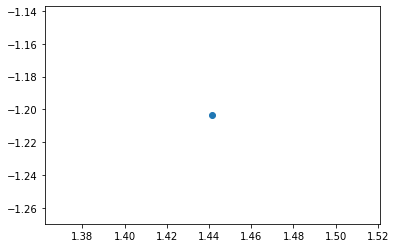

In [29]:
plt.scatter(t[0, 0], t[0,1])

In [43]:
u ** 2 + v ** 2

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

(-1.991587471961975, 4.826582264900208, -4.800276005268097, 2.693495237827301)

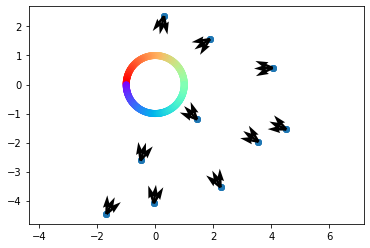

In [238]:
x, y = rays_o[::2, 0], rays_o[::2, 1]
u, v = rays_d[::2, 0], rays_d[::2, 1]
plt.scatter(x, y)
plt.quiver(x, y, u, v)
r = 1
theta = torch.linspace(0, 2 * math.pi, 360)
x1, y1 = r * torch.cos(theta), r * torch.sin(theta)
color = curve_color(x1, y1)
plt.scatter(x1, y1, c=color)
plt.axis('equal')

In [13]:
plt.scatter(x, y)
plt.quiver(x, y, u, v)

NameError: name 'plt' is not defined

In [43]:
dirs.shape

torch.Size([2, 61])

In [10]:
import shapely
from shapely.geometry import LineString
from shapely.geometry import Point

center, r  = (0, 0), 1
circle = Point(center).buffer(r).boundary

In [ ]:
line = LineString([(0,0), (2, 2)])
res = line.intersects(circle)

In [5]:
i.geoms[0].coords[0]
i.geoms[1].coords[0]

(7.121320343559642, 7.121320343559642)

In [6]:
p = Point(0, 0)
c = p.buffer(3).boundary
l = LineString([(10, 0), (10, 10)])
i = c.intersection(l)

In [93]:
def circle_line_intersect(p1, p2, center, r):
    """
    Find the intersection of circle defined by (center, r) and the line defined by two points on it (p1, p2)
    p1: (N, 2)
    p2: (N, 2)
    center (2,)
    r (1,)
    """
    # shift the coordinate origin
    p1_new = p1 - center
    p2_new = p2 - center

    dxy = p2_new - p1_new
    D = p1_new[:, 0] * p2_new[:, 1] - p1_new[:, 1] * p2_new[:, 0]
    dr_2 = (dxy**2).sum(-1)
    
    delta = r**2 * dr_2 - D**2 
    has_sol = delta > 0
    D_good, dxy_good, dr_2_good, delta_good = list(map(lambda x: x[has_sol], [D, dxy, dr_2, delta]))
    x1 = (D_good * dxy_good[:, 1] + torch.sign(dxy_good[:, 1]+1e-5) * dxy_good[:, 0] * torch.sqrt(delta_good)) / dr_2_good
    y1 = (-D_good * dxy_good[:, 0] + torch.abs(dxy_good[:, 1]) * torch.sqrt(delta_good)) / dr_2_good
    x2 = (D_good * dxy_good[:, 1] - torch.sign(dxy_good[:, 1]+1e-5) * dxy_good[:, 0] * torch.sqrt(delta_good)) / dr_2_good
    y2 = (-D_good * dxy_good[:, 0] - torch.abs(dxy_good[:, 1]) * torch.sqrt(delta_good)) / dr_2_good
    # assume p1 is the start point
    y_ori = p1_new[:, 1][has_sol]
    x = torch.where(y_ori > 0, x1, x2)
    y = torch.where(y_ori > 0, y1, y2)
    return x, y, has_sol

In [58]:
torch.stack([x, y]).shape

torch.Size([2, 60])

In [59]:
p1 = torch.stack([x, y]).t()
p2 = p1 + torch.stack([u, v]).t()

In [60]:
p1.shape

torch.Size([60, 2])

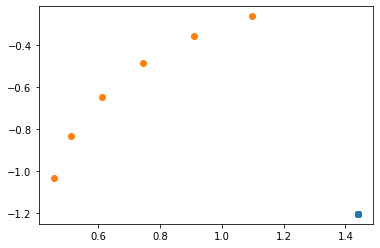

In [61]:
plt.scatter(p1[:6, 0], p1[:6, 1])
plt.scatter(p2[:6, 0], p2[:6, 1])

(0.11315402463078499,
 2.3527948699891565,
 -3.688943237066269,
 -0.4627287685871124)

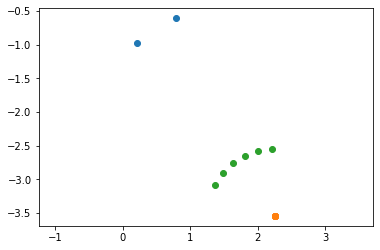

In [92]:
i = 8
p1_new = p1[i*6:(i+1)*6]
p2_new = p2[i*6:(i+1)*6]
x_int, y_int, has_sol = circle_line_intersect(p1=p1_new,p2=p2_new,center=torch.tensor((0, 0)),r=1)
plt.scatter(x_int, y_int)
plt.scatter(p1_new[:, 0], p1_new[:, 1])
plt.scatter(p2_new[:, 0], p2_new[:, 1])
plt.axis('equal')

(-1.9389567419886589,
 0.15118298381567002,
 -4.646995598077774,
 -0.5253933131694793)

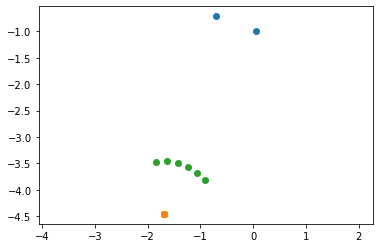

In [87]:
plt.scatter(x_int, y_int)
plt.scatter(p1_new[:, 0], p1_new[:, 1])
plt.scatter(p2_new[:, 0], p2_new[:, 1])
plt.axis('equal')

In [82]:
x_int ** 2 + y_int ** 2

tensor([1.0000, 1.0000])

In [108]:
from torch.utils.data import Dataset
from data_gen import *
class OneDCurveNewData(Dataset):
    def __init__(self, n_samples=1000) -> None:
        super().__init__()
        near = 1.5 
        far = 4
        self.n_samples = n_samples
        c2w = sample_camera_pose(n_samples)
        fov = torch.tensor([-math.pi/6, math.pi/6])
        rays_d, rays_o = get_rays(fov, c2w)

        self.x = rays_o[:, 0]
        self.y = rays_o[:, 1]
        self.view = torch.atan2(rays_d[:, 1], rays_d[:, 0])
        x, y, has_sol = circle_line_intersect(rays_o, rays_o + rays_d, torch.tensor([0, 0]), 1)
        self.color = torch.zeros(has_sol.shape + (3,))
        self.color[has_sol] = torch.from_numpy(curve_color(x, y)).float()
        # self.color[torch.abs(curve_fn(self.x, self.y)) > 1e-1] = 0
    
    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx):
        return torch.stack([self.x[idx], self.y[idx], self.view[idx]]), self.color[idx]

In [154]:
def get_rays(fov, c2w):
    """
    Start from camera center, sample points from fov along certain depth distance,
    then transform the points to the world coordinates

    For the camera coordinates, y is pointing to the world center and x forms a 
    right-hand coordinates with y facing outward

    Args:
        fov (2): [description]
        c2w (N, 3, 3): [description]
    
    Returns:
        rays_d (N, 2) direction rays
        rays_o (N, 2) origin of rays
    """
    
    # sample distance along each rays_d
    dirs = get_dirs(fov)

    R, t = c2w[..., :2, :2], c2w[..., :2, -1]
    rays_d = (R @ dirs)
    rays_o = t[...,None].expand(rays_d.shape)
    rays_d, rays_o = rays_d.transpose(1, 2).reshape(-1, 2), rays_o.transpose(1, 2).reshape(-1, 2)
    return rays_d, rays_o

In [180]:
class OneDCurveNewData(Dataset):
    def __init__(self, n_samples=1000) -> None:
        super().__init__()
        self.n_samples = n_samples
        c2w = sample_camera_pose(n_samples, near=1.5, far=4)
        fov = torch.tensor([-math.pi/10, math.pi/10])
        rays_d, rays_o = get_rays(fov, c2w)

        self.x = rays_o[:, 0]
        self.y = rays_o[:, 1]
        self.view = torch.atan2(rays_d[:, 1], rays_d[:, 0])
        x, y, has_sol = circle_line_intersect(rays_o, rays_o + rays_d, torch.tensor([0, 0]), 1)
        self.has_sol = has_sol
        self.color = torch.zeros(has_sol.shape + (3,))
        self.color[has_sol] = torch.from_numpy(curve_color(x, y)).float()
    
    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx):
        return torch.stack([self.x[idx], self.y[idx], self.view[idx]]), self.color[idx]

In [167]:
def circle_line_intersect(p1, p2, center, r):
    """
    Find the intersection of circle defined by (center, r) and the line defined by two points on it (p1, p2)
    p1: (N, 2)
    p2: (N, 2)
    center (2,)
    r (1,)
    """
    # shift the coordinate origin
    p1_new = p1 - center
    p2_new = p2 - center

    dxy = p2_new - p1_new
    D = p1_new[:, 0] * p2_new[:, 1] - p1_new[:, 1] * p2_new[:, 0]
    dr_2 = (dxy**2).sum(-1)
    
    delta = r**2 * dr_2 - D**2 
    # import pdb; pdb.set_trace()
    print('delta', delta.shape)
    has_sol = delta > 0
    D_good, dxy_good, dr_2_good, delta_good = list(map(lambda x: x[has_sol], [D, dxy, dr_2, delta]))
    x1 = (D_good * dxy_good[:, 1] + torch.sign(dxy_good[:, 1]+1e-5) * dxy_good[:, 0] * torch.sqrt(delta_good)) / dr_2_good
    y1 = (-D_good * dxy_good[:, 0] + torch.abs(dxy_good[:, 1]) * torch.sqrt(delta_good)) / dr_2_good
    x2 = (D_good * dxy_good[:, 1] - torch.sign(dxy_good[:, 1]+1e-5) * dxy_good[:, 0] * torch.sqrt(delta_good)) / dr_2_good
    y2 = (-D_good * dxy_good[:, 0] - torch.abs(dxy_good[:, 1]) * torch.sqrt(delta_good)) / dr_2_good
    # assume p1 is the start point
    y_ori = p1_new[:, 1][has_sol]
    x = torch.where(y_ori > 0, x1, x2)
    y = torch.where(y_ori > 0, y1, y2)
    return x, y, has_sol


In [181]:
from vis import vis_data
dataset = OneDCurveNewData(1000)
# vis_data(dataset.x, dataset.y, dataset.view, dataset.color)
print(dataset.has_sol.sum())
print((dataset.color.sum(-1) == 0).sum())

delta torch.Size([37000])
tensor(35448)
tensor(1552)


In [182]:
(dataset.color.sum(-1) == 0).sum()

tensor(1552)

delta torch.Size([370])


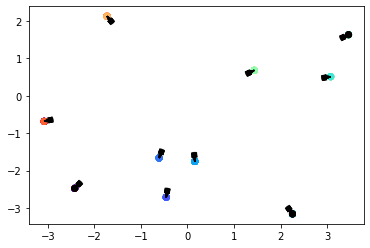

In [183]:
from vis import vis_data
dataset = OneDCurveNewData(10)
vis_data(dataset.x, dataset.y, dataset.view, dataset.color)

In [186]:
(dataset.color.sum(-1) == 0).sum()

tensor(18)

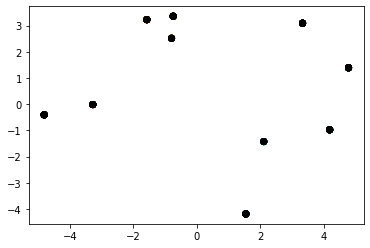

In [110]:
dataset = OneDCurveNewData(10)
plt.scatter(dataset.x, dataset.y, c=dataset.color)

In [111]:
dataset.color

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [12]:
def render_path_circle(model, cuda=True):
    """
    Sample points along the circle and render what is the view
    """
    r = 3
    theta = torch.linspace(0, 2 * math.pi, 360)
    x, y = r * torch.cos(theta), r * torch.sin(theta)
    rays_o = torch.stack([x, y]).t()
    rays_d = -theta
    view_dirs = rays_d
    if cuda:
        rays_o, rays_d, view_dirs = rays_o.cuda(), rays_d.cuda(), view_dirs.cuda()
    res = render_rays(rays_o, rays_d, view_dirs, model.forward)
    return x, y, res


In [37]:
import math
import torch
from model import NeRF, NeRF_Noview
from vis import vis_res, render_rays
# model = NeRF.load_from_checkpoint('lightning_logs/version_57_part/checkpoints/epoch=165-step=2655.ckpt')
# model = NeRF.load_from_checkpoint('/mnt/volume2/Data/zlz/shzhou2/project/nerf/lightning_logs/version_63_part/checkpoints/epoch=999-step=7999.ckpt')
# model = NeRF.load_from_checkpoint('/mnt/volume2/Data/zlz/shzhou2/project/nerf/lightning_logs/version_72/checkpoints/epoch=999-step=7999.ckpt')
model = NeRF_Noview.load_from_checkpoint('/mnt/volume2/Data/zlz/shzhou2/project/nerf/lightning_logs/version_88/checkpoints/epoch=112-step=98083.ckpt')
model.eval()
model.cuda()
with torch.no_grad():
    x, y, res = render_path_circle(model)
res = res.cpu().clip(0, 1)
# import pdb; pdb.set_trace()
vis_res(x, y, res)

ImportError: cannot import name 'NeRF_Noview' from 'model' (/mnt/volume2/Data/zlz/shzhou2/project/nerf/model.py)

In [34]:
import math
import torch
from model import NeRF
from vis import vis_res, render_rays
# test the result at given dataset point
dataset = torch.load('dataset.pth', map_location='cpu')

In [2]:
dataset

In [3]:
model = NeRF.load_from_checkpoint('/mnt/volume2/Data/zlz/shzhou2/project/nerf/lightning_logs/version_83/checkpoints/epoch=397-step=25073.ckpt')
model.eval()
model.cuda()

NeRF(
  (layer1): Linear(in_features=2, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3_1): Linear(in_features=128, out_features=1, bias=True)
  (layer3_2): Linear(in_features=128, out_features=128, bias=True)
  (layer4): Linear(in_features=129, out_features=128, bias=True)
  (layer5): Linear(in_features=128, out_features=128, bias=True)
  (layer6): Linear(in_features=128, out_features=3, bias=True)
)

In [8]:
test_id = [(8 * i) for i in range(300)]
rays_o = torch.stack([dataset.x, dataset.y]).t()[test_id]
rays_d = dataset.view[test_id]
view_dirs = rays_d
rays_o, rays_d, view_dirs = rays_o.cuda(), rays_d.cuda(), view_dirs.cuda()
res = render_rays(rays_o, rays_d, view_dirs, model.forward)

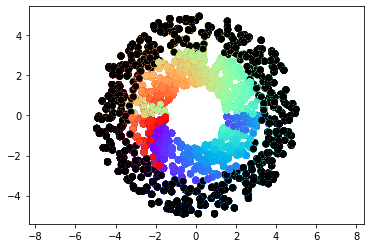

In [35]:
vis_res(dataset.x.detach(), dataset.y.cpu(), dataset.color.cpu().detach())

In [28]:
test_id = [3, 4]
rays_o = torch.stack([dataset.x, dataset.y]).t()[test_id]
rays_d = dataset.view[test_id]

In [29]:
rays_d, rays_o

(tensor([-2.0527, -1.9629]),
 tensor([[0.6817, 1.4593],
         [0.6817, 1.4593]]))

In [30]:
rays_d.mean()

tensor(-2.0078)

In [33]:
rays_o[0] / torch.sqrt((rays_o[0]**2).sum())

tensor([0.4232, 0.9060])

In [32]:
torch.cos(rays_d.mean()), torch.sin(rays_d.mean())

(tensor(-0.4232), tensor(-0.9060))

In [23]:
torch.cos(rays_d[0]), torch.sin(rays_d[0])

(tensor(-0.4634), tensor(-0.8861))

In [100]:
print(dataset.view.shape)
torch.stack([dataset.x, dataset.y]).shape

torch.Size([8000])


torch.Size([2, 8000])

In [10]:
res.sum(-1).min()

tensor(0.0682)

In [16]:
from run_nerf import linear_sample, stratified_sample, raw2outputs, sigma2alpha
cuda = True
def render_rays_step(rays_o, rays_d, view_dirs, network_fn):
    near = 0
    far = 4
    n_samples = 64
    if cuda:
        z_vals = linear_sample(near, far, n_samples).cuda()
    else:
        z_vals = linear_sample(near, far, n_samples)
    # import pdb; pdb.set_trace()

    pts = rays_o[...,None,:] + torch.stack([torch.cos(rays_d)[...,None] * z_vals[None, ...], torch.sin(rays_d)[...,None] * z_vals[None, ...]], -1)
    raw = network_fn(torch.cat([pts, view_dirs[...,None, None].expand((-1, n_samples, 1))],-1))
    return raw, z_vals
def raw2outputs_step(raw, z_vals):
    dists = z_vals[...,1:] - z_vals[...,:-1]
    if cuda:
        dists = torch.cat([dists, torch.Tensor([1e10]).expand(dists[...,:1].shape).cuda()], -1)
    else:
        dists = torch.cat([dists, torch.Tensor([1e10]).expand(dists[...,:1].shape)], -1)
    
    rgb = torch.sigmoid(raw[...,:3])
    alpha = sigma2alpha(raw[...,3], dists)
    
    # import pdb; pdb.set_trace()
    if cuda:
        weights = alpha * torch.cumprod(torch.cat([torch.ones((alpha.shape[0], 1)).cuda(), 1.-alpha + 1e-10], -1), -1)[..., :-1]
    else:
        weights = alpha * torch.cumprod(torch.cat([torch.ones((alpha.shape[0], 1)), 1.-alpha + 1e-10], -1), -1)[..., :-1]
    # import pdb; pdb.set_trace()
    rgb_map = torch.sum(weights[...,None] * rgb, -2)
    return rgb_map, weights, rgb 

In [19]:
r = 1.0
theta = torch.linspace(0, 2 * math.pi, 360)
x, y = r * torch.cos(theta), r * torch.sin(theta)
rays_o = torch.stack([x, y]).t()
rays_d = -theta
view_dirs = rays_d
if cuda:
    rays_o, rays_d, view_dirs = rays_o.cuda(), rays_d.cuda(), view_dirs.cuda()
raw, z_vals = render_rays_step(rays_o[213:214], rays_d[213:214], view_dirs[213:214], model.forward)
res, weight, rgb = raw2outputs_step(raw, z_vals)

In [27]:
weight.shape

torch.Size([1, 64])

<BarContainer object of 64 artists>

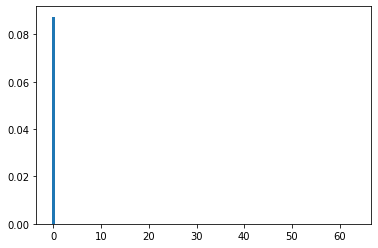

In [28]:
plt.bar(torch.arange(weight.shape[1]), weight[0].cpu().detach())

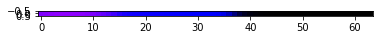

In [30]:
plt.imshow(rgb.cpu().detach())

In [18]:
res

tensor([[1.3322e-02, 2.2843e-06, 2.6603e-02]], device='cuda:0',
       grad_fn=<SumBackward1>)

In [11]:
torch.arange(360)[torch.argmin(res.sum(-1))]

tensor(213)

delta torch.Size([18500])


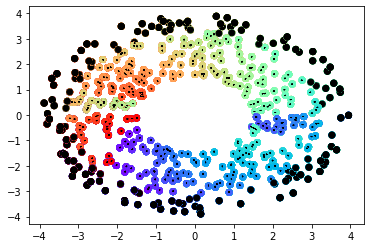

In [196]:
from vis import vis_data
dataset = OneDCurveNewData(500)
vis_data(dataset.x, dataset.y, dataset.view, dataset.color)

In [194]:
print(dataset.color.shape)
(dataset.color.sum(-1) == 0).sum()

torch.Size([11100, 3])


tensor(518)

In [231]:
class OneDCurveOccData(Dataset):
    def __init__(self,n_samples=1000) -> None:
        super().__init__()

        self.n_samples = n_samples
        c2w = sample_camera_pose(n_samples, near=5, far=10)
        fov = torch.tensor([-0.1, 0.1])
        rays_d, rays_o = get_rays(fov, c2w)

        self.x = rays_o[:, 0]
        self.y = rays_o[:, 1]
        self.view = torch.atan2(rays_d[:, 1], rays_d[:, 0])
        # self.has_sol = has_sol
        x1, y1, has_sol1 = circle_line_intersect(rays_o, rays_o + rays_d, torch.tensor([1, 0]), 1)
        x2, y2, has_sol2 = circle_line_intersect(rays_o, rays_o + rays_d, torch.tensor([-1, 0]), 1)

        # color is taken from closest points from (x1, y1) or (x2, y2)
        self.color = torch.zeros(has_sol1.shape + (3,))
        self.color[has_sol1] = torch.from_numpy(curve_color(x1, y1)).float()
        self.color[has_sol2] = torch.from_numpy(curve_color(x2, y2)).float()
        #self.color = torch.from_numpy(curve_color(self.x/r, self.y/r))
        # self.color[torch.abs(curve_fn(self.x, self.y)) > 1e-1] = 0
    
    def __len__(self):
        return self.n_samples * 2

    def __getitem__(self, idx):
        return torch.stack([self.x[idx], self.y[idx], self.view[idx]]), self.color[idx]

delta torch.Size([3600])
delta torch.Size([3600])


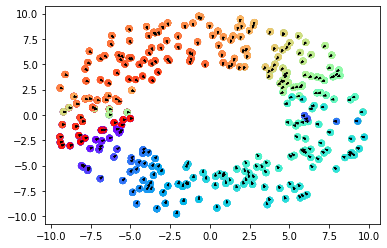

In [232]:

dataset = OneDCurveOccData(300)
vis_data(dataset.x, dataset.y, dataset.view, dataset.color)